## Exportamos las librerias.

In [1]:
#Libreria para hacer DataFrame 
import pandas as pd 

#Libreria Para hacer grafica y comparaciones 
import seaborn as sns

#Librerias para graficas de forma general 
from matplotlib import pyplot as plt

## Extraemos los datos de la API en formato JSON.

In [2]:
dt = pd.read_json('Proyecto_Jardin.json')

## Podemos ver nuestros datos de la API.

In [3]:
dt  #Humedad ambiente, temperatura ambiente, humedad de la tierra y fecha.

,id,H_AM,T_AM,H_SU,fechaJ
0,28,23.2,21,32.1,2021-03-07 18:46:19
1,29,50.0,23,44.0,2021-03-07 18:47:04
2,30,40.0,23,39.0,2021-03-07 18:48:04
3,31,60.0,25,33.0,2021-03-07 18:48:45
4,32,55.0,28,12.0,2021-03-07 18:49:45
5,33,43.0,28,11.0,2021-03-07 18:50:04
6,34,55.0,19,43.0,2021-03-07 18:50:31
7,35,55.0,19,43.0,2021-03-07 18:50:42
8,36,31.0,34,39.0,2021-03-07 18:51:20
9,37,39.0,21,31.0,2021-03-07 18:52:20


## Imprimir nuestra información sobre nuestro DataFrame 

In [4]:
dt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18 entries, 0 to 17
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   id      18 non-null     int64  
 1   H_AM    18 non-null     float64
 2   T_AM    18 non-null     int64  
 3   H_SU    18 non-null     float64
 4   fechaJ  18 non-null     object 
dtypes: float64(2), int64(2), object(1)
memory usage: 848.0+ bytes


## Este comando genera estadísticas descriptivas sobre nuestra API.


In [5]:
dt.describe()

,id,H_AM,T_AM,H_SU
count,18.000000,18.000000,18.000000,18.00000
mean,36.666667,36.288889,28.166667,29.45000
std,5.594115,14.084488,7.461667,10.24685
min,28.000000,16.000000,18.000000,11.00000
25%,32.250000,23.900000,21.500000,22.25000
50%,36.500000,35.000000,28.000000,31.55000
75%,40.750000,48.250000,34.750000,37.75000
max,46.000000,60.000000,43.000000,44.00000


## Vamos a ver nuestra correlación de nuestros datos.

In [6]:
dt.corr()

,id,H_AM,T_AM,H_SU
id,1.000000,-0.606276,0.559467,-0.246492
H_AM,-0.606276,1.000000,-0.587300,0.250657
T_AM,0.559467,-0.587300,1.000000,-0.456264
H_SU,-0.246492,0.250657,-0.456264,1.000000


##  Vamos a relacionar nuestros datos de la API. 

In [7]:
Relation = dt[['H_AM','T_AM','H_SU']] 

In [8]:
Relation.head()

,H_AM,T_AM,H_SU
0,23.2,21,32.1
1,50.0,23,44.0
2,40.0,23,39.0
3,60.0,25,33.0
4,55.0,28,12.0


## Vamos a ver como se relacionan nuestros datos.

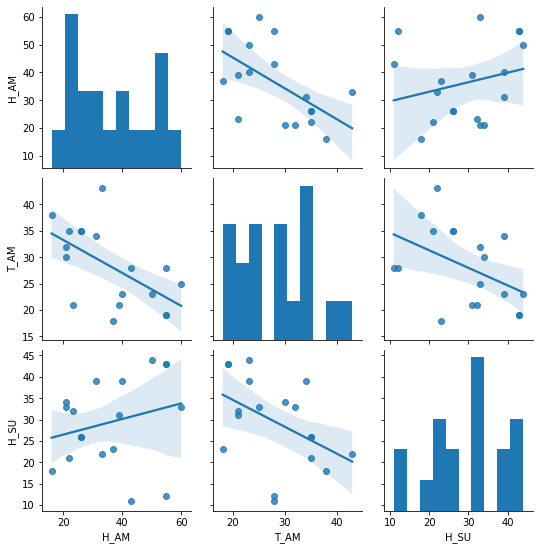

In [9]:
sns.pairplot(Relation, kind='reg')
plt.show()

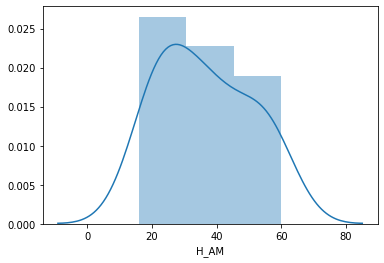

In [10]:
sns.distplot(dt.H_AM)

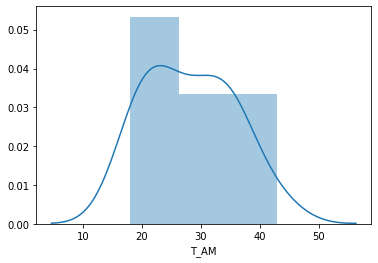

In [11]:
sns.distplot(dt.T_AM)

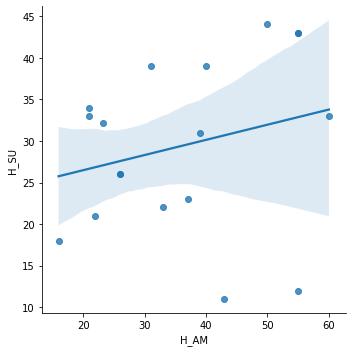

In [13]:
sns.lmplot(x='H_AM', y='H_SU', data=dt)  #Humedad ambiente y humedad de la tierra.


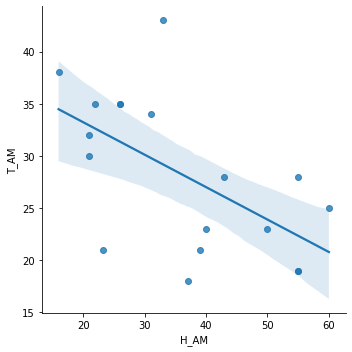

In [14]:
sns.lmplot(x='H_AM', y='T_AM', data=dt) #Humedad ambiente y temperatua ambiente 

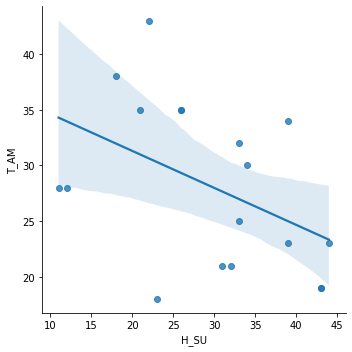

In [15]:
sns.lmplot(x='H_SU', y='T_AM', data=dt)

In [16]:
dt.columns ##Las etiquetas de las columnas del dataframe 

Index(['id', 'H_AM', 'T_AM', 'H_SU', 'fechaJ'], dtype='object')

In [22]:
pd.unique(dt['H_AM']) ## Trae los valores unicos de la Humedad ambiente

array([23.2, 50. , 40. , 60. , 55. , 43. , 31. , 39. , 26. , 16. , 37. ,
       22. , 33. , 21. ])

In [23]:
pd.unique(dt['T_AM']) #Trae los valores unicos de temperatura ambiente

array([21, 23, 25, 28, 19, 34, 35, 38, 18, 43, 32, 30])

## Minimo, Maximo, promedio, desviasión estandar, conteo. 

In [24]:
data = dt['H_AM'].min(), dt['H_AM'].max(), dt['H_AM'].mean(), dt['H_AM'].std(),dt['H_AM'].count()

In [25]:
data

(16.0, 60.0, 36.28888888888889, 14.084488292356111, 18)

In [28]:
data = dt['T_AM'].min(), dt['T_AM'].max(), dt['T_AM'].mean(), dt['T_AM'].std(),dt['T_AM'].count()

In [29]:
data

(18, 43, 28.166666666666668, 7.461666743311128, 18)

In [30]:
data = dt['H_SU'].min(), dt['H_SU'].max(), dt['H_SU'].mean(), dt['H_SU'].std(),dt['H_SU'].count()

In [31]:
data

(11.0, 44.0, 29.450000000000003, 10.246850305165513, 18)

## Renombrando las columnas para un mejor manejo

In [50]:
dt.rename (columns = {dt.columns [1]: 'Humedad Ambiente'}, inplace = True)
dt.rename (columns = {dt.columns [2]: 'Temperatura Suelo'}, inplace = True)
dt.rename (columns = {dt.columns [3]: 'Humedad Suelo'}, inplace = True)
dt.rename (columns = {dt.columns [4]: 'Fecha'}, inplace = True)



In [51]:
dt



,id,Humedad Ambiente,Temperatura Suelo,Humedad Suelo,Fecha
0,28,23.2,21,32.1,2021-03-07 18:46:19
1,29,50.0,23,44.0,2021-03-07 18:47:04
2,30,40.0,23,39.0,2021-03-07 18:48:04
3,31,60.0,25,33.0,2021-03-07 18:48:45
4,32,55.0,28,12.0,2021-03-07 18:49:45
5,33,43.0,28,11.0,2021-03-07 18:50:04
6,34,55.0,19,43.0,2021-03-07 18:50:31
7,35,55.0,19,43.0,2021-03-07 18:50:42
8,36,31.0,34,39.0,2021-03-07 18:51:20
9,37,39.0,21,31.0,2021-03-07 18:52:20


In [43]:
date = dt.sort_values('Humedad Ambiente')



In [44]:
date['Humedad Ambiente']

12    16.0
17    21.0
16    21.0
14    22.0
0     23.2
10    26.0
11    26.0
8     31.0
15    33.0
13    37.0
9     39.0
2     40.0
5     43.0
1     50.0
6     55.0
7     55.0
4     55.0
3     60.0
Name: Humedad Ambiente, dtype: float64

In [46]:
date = dt.sort_values('Temperatura Suelo')

In [48]:
date['Temperatura Suelo']

13    18
6     19
7     19
0     21
9     21
1     23
2     23
3     25
4     28
5     28
17    30
16    32
8     34
11    35
14    35
10    35
12    38
15    43
Name: Temperatura Suelo, dtype: int64

In [52]:
date = dt.sort_values('Humedad Suelo')

In [54]:
date['Humedad Suelo']

5     11.0
4     12.0
12    18.0
14    21.0
15    22.0
13    23.0
10    26.0
11    26.0
9     31.0
0     32.1
3     33.0
16    33.0
17    34.0
2     39.0
8     39.0
6     43.0
7     43.0
1     44.0
Name: Humedad Suelo, dtype: float64